# Predicting heart disease using machine learning
This notebook looks into using various python based machine learning and data science libraries in an attemp to build a machine learning model capable of predicting heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient , can we predict whether or not they have heart disease ?

## 2. Data

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
8. resting electrocardiographic results (values 0,1,2)
9. maximum heart rate achieved
10. exercise induced angina
11. oldpeak = ST depression induced by exercise relative to rest
12. the slope of the peak exercise ST segment
13. number of major vessels (0-3) colored by flourosopy
14. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

Source of Data : https://www.kaggle.com/ronitf/heart-disease-uci?select=heart.csv

# Preparing the Tools

In [2]:
# Import all the tools we need

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plaots to appear inside our notebook

%matplotlib inline 

#Models from Scikit-Learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor

# Model Evaluations
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score , recall_score , f1_score
from sklearn.metrics import plot_roc_curve

In [3]:
df = pd.read_csv("heart.csv")
df.shape #(rows , columns)

(303, 14)

In [4]:
## Data Exploration  
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [7]:
df["age"].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
41    10
64    10
63     9
67     9
65     8
55     8
61     8
53     8
45     8
43     8
42     8
50     7
66     7
48     7
46     7
49     5
47     5
70     4
39     4
68     4
35     4
69     3
40     3
38     3
71     3
37     2
34     2
76     1
29     1
74     1
77     1
Name: age, dtype: int64

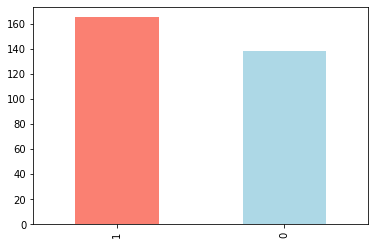

In [8]:
df["target"].value_counts().plot( kind = "bar" , color = ["salmon" , "lightblue"]);

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
# Are ther any missing values ?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to Sex

In [12]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
pd.crosstab(df["target"] , df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


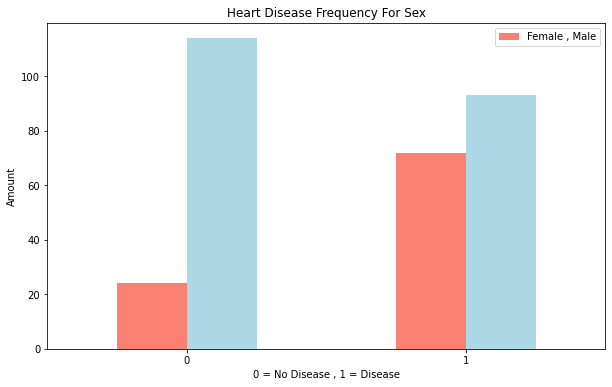

In [14]:
pd.crosstab(df.target ,df.sex).plot(
    kind = "bar",
    figsize = (10 , 6),
    color = ["salmon" , "lightblue"]);

plt.title("Heart Disease Frequency For Sex")
plt.xlabel("0 = No Disease , 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female , Male"])
plt.xticks(rotation = 0);

## Age vs. Max Heart Rate for Heart Disease

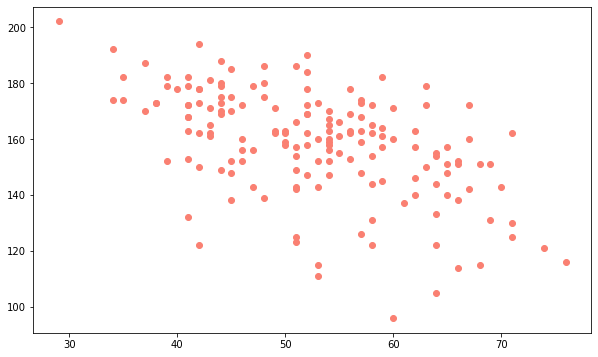

In [15]:
# Create another figure
plt.figure(figsize = (10 , 6))

# Scatter with positive examples
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target == 1],
           c = "salmon");

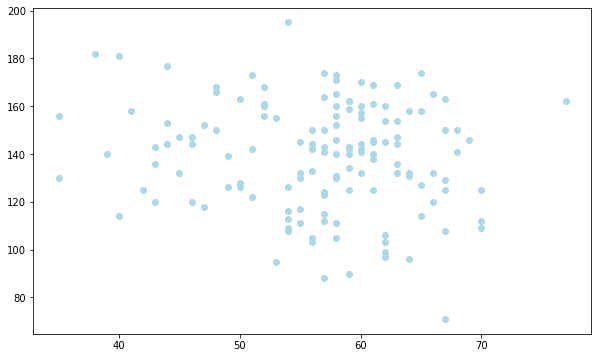

In [16]:
# Create another figure
plt.figure(figsize = (10 , 6))

plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0],
           c = "lightblue",
           );

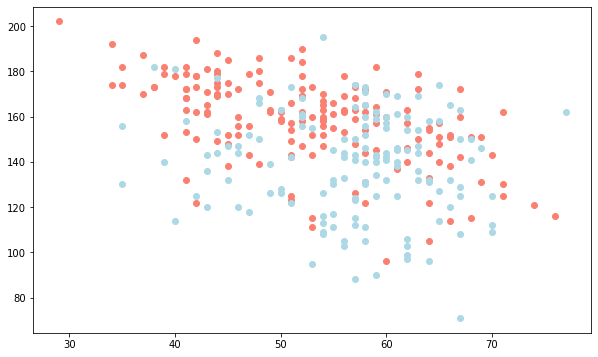

In [17]:
# Create another figure
plt.figure( figsize = (10 , 6))

# Scatter with positive examples
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target == 1],
           c = "salmon");

plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0],
           c = "lightblue");

 


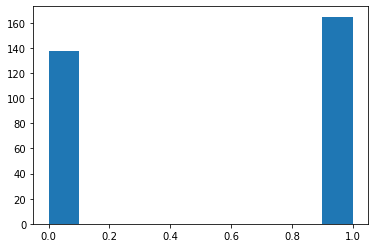

In [18]:
plt.hist(df.target)
plt.show();

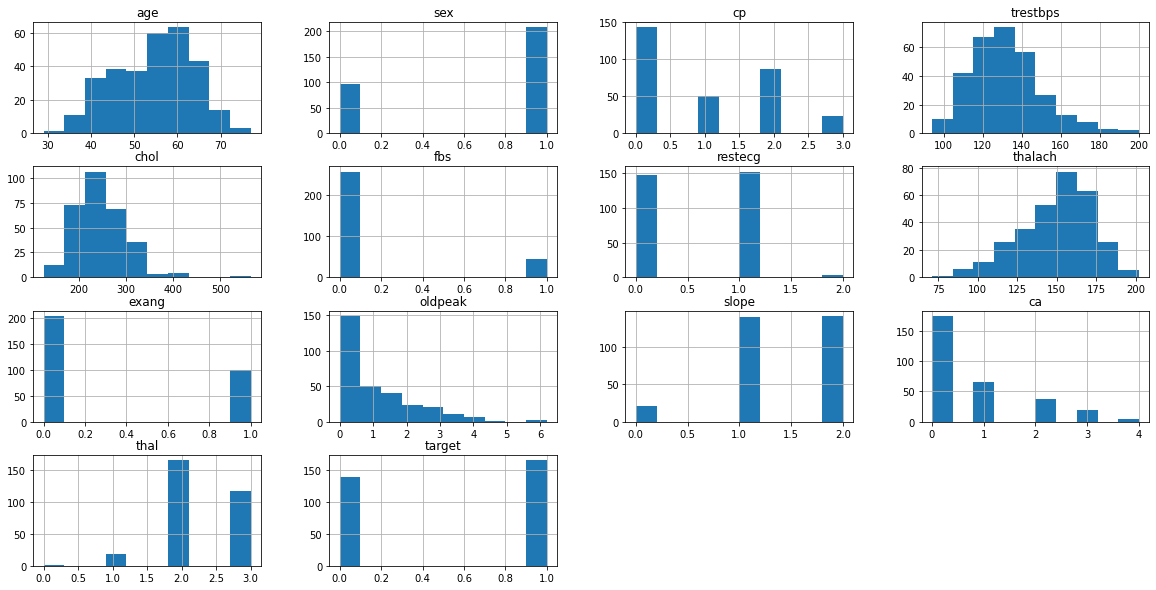

In [19]:
df.hist(figsize = (20 , 10));

 # Heart Disease Frequency per Chest Pain Type

In [20]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


* Here we can see that there are these values of chest pain

In [21]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

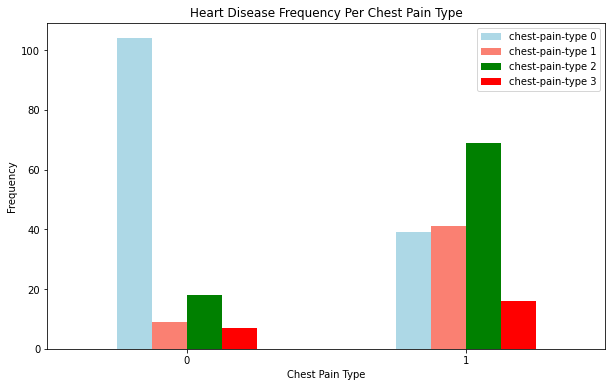

In [22]:
# Create a new crosstab and base plot
pd.crosstab(df.target , df.cp).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon","green","red"])

# Add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["chest-pain-type 0", "chest-pain-type 1","chest-pain-type 2","chest-pain-type 3"])
plt.xticks(rotation = 0);

* Making a cross relation matrix

In [23]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


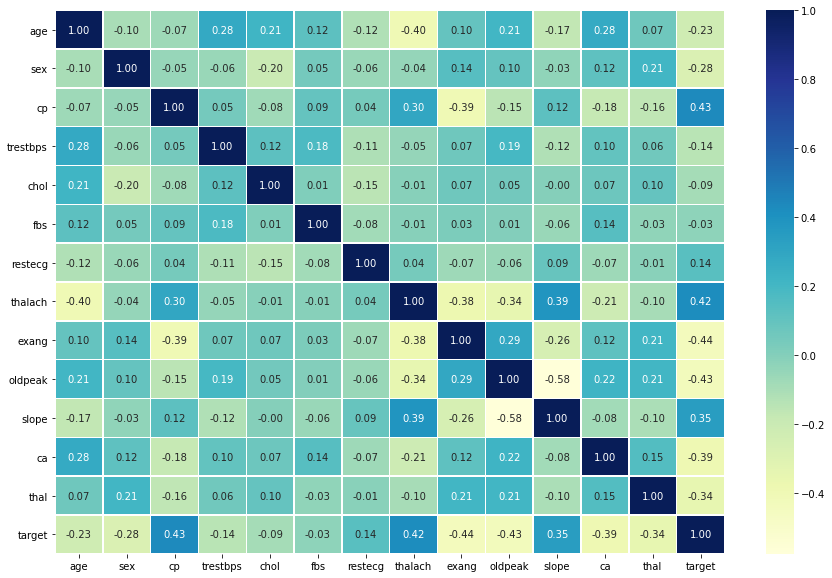

In [24]:
# Let's make it look a little prettier
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
# Everything except target variable
X = df.drop("target", axis=1)

# Target variable
y = df.target.values

y[:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [27]:
# Independent variables (no target column)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [28]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

In [29]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [30]:
y_train, len(y_train)

(array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
       dtype=int64),
 242)

In [31]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [32]:
y_test, len(y_test)

(array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64),
 61)


# Model choices

* Now we've got our data prepared, we can start to fit models. We'll be using the following and comparing their results.

    1. Logistic Regression - LogisticRegression()
    2. K-Nearest Neighbors - KNeighboursClassifier()
    3. RandomForest - RandomForestClassifier()



# Here I have written a function to train and score different models 

In [33]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [34]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

D:\Machine-Learning\Project-2-Heart-Disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

* In the plot we can see that RandomForest has greatest score.

,KNN,Logistic Regression,Random Forest
accuracy,0.688525,0.885246,0.836066


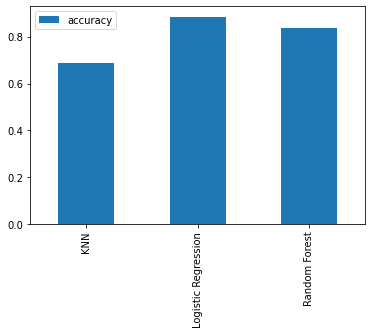

In [35]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();
model_compare

In [36]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

In [37]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

Maximum KNN score on the test data: 75.41%


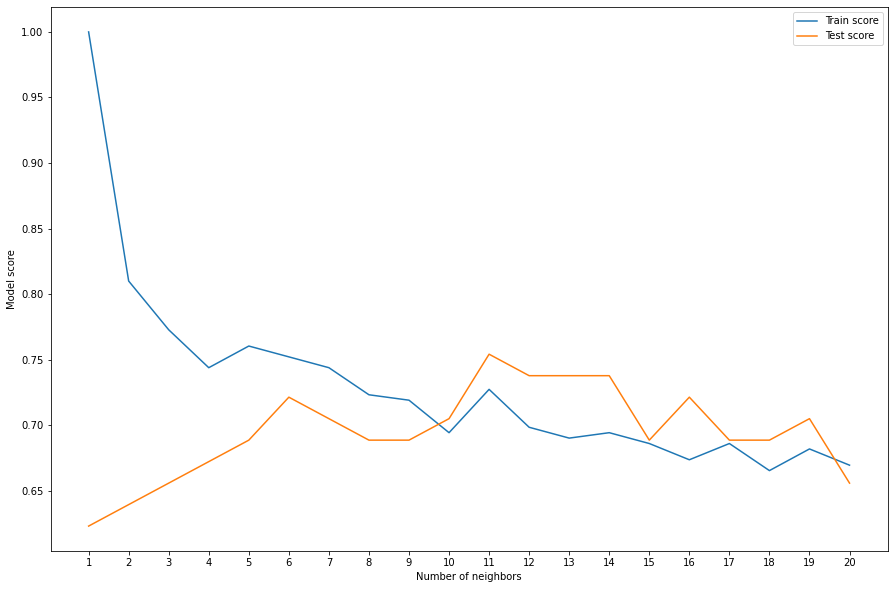

In [38]:
plt.figure(figsize=(15, 10))
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [39]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [40]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=3,
                                n_iter=20,
                                verbose= 3)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END .....................C=0.0001, solver=liblinear; total time=   0.1s
[CV 2/3] END .....................C=0.0001, solver=liblinear; total time=   0.0s
[CV 3/3] END .....................C=0.0001, solver=liblinear; total time=   0.0s
[CV 1/3] END .....C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV 2/3] END .....C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV 3/3] END .....C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV 1/3] END ......C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV 2/3] END ......C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV 3/3] END ......C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV 1/3] END ......C=0.0018329807108324356, solver=liblinear; total time=   0.0s
[CV 2/3] END ......C=0.0018329807108324356, solver=liblinear; total time=   0.0s
[CV 3/3] END ......C=0.0018329807108324356, solv

In [41]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [42]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [43]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv= 2,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 2 folds for each of 20 candidates, totalling 40 fits


In [44]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 960,
 'min_samples_split': 4,
 'min_samples_leaf': 13,
 'max_depth': 3}

In [45]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.8688524590163934

In [46]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);


Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [47]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [48]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [49]:
# Make preidctions on test data
y_preds = gs_log_reg.predict(X_test)

In [50]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [51]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

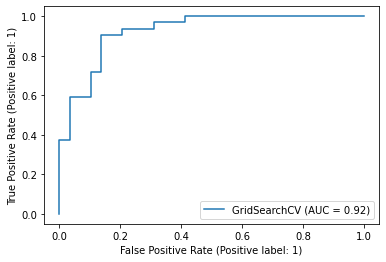

In [52]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

In [53]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


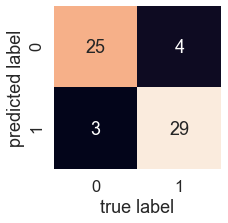

In [54]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)


  * Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
  * Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
  * F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
  * Support - The number of samples each metric was calculated on.
  * Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
  * Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
  * Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).


In [55]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [56]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [57]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [58]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, 
                         scoring="accuracy") 
# 5-fold cross-validation
# accuracy as scoring
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [59]:
np.mean(cv_acc)

0.8479781420765027

In [60]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.8215873015873015

In [61]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.9272727272727274

In [62]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8705403543192143

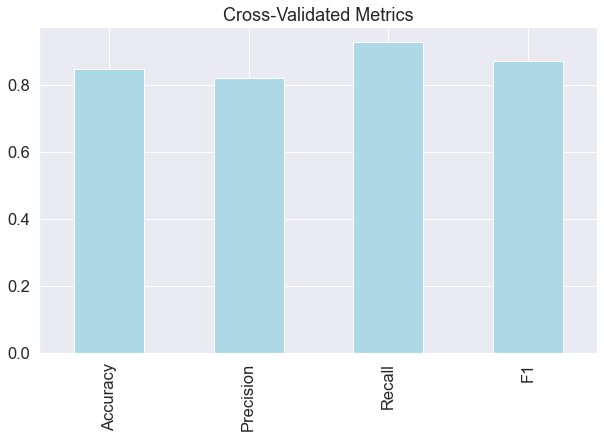

In [63]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": np.mean(cv_acc),
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
# cv_metrics.crosstab()
# # Visual
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False , color = ["lightblue"] , figsize = (10 , 6));

In [64]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(X_train, y_train);

In [65]:
# Check coef_
clf.coef_[0]

array([ 0.00369922, -0.90424087,  0.67472828, -0.0116134 , -0.00170364,
        0.04787689,  0.33490186,  0.02472938, -0.63120403, -0.57590919,
        0.4709512 , -0.6516535 , -0.69984202])

In [66]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.003699219011760782,
 'sex': -0.9042408714480176,
 'cp': 0.6747282766540338,
 'trestbps': -0.01161340334265323,
 'chol': -0.0017036446360052262,
 'fbs': 0.04787688669240361,
 'restecg': 0.3349018562558094,
 'thalach': 0.024729384743360134,
 'exang': -0.631204028843173,
 'oldpeak': -0.575909185434028,
 'slope': 0.47095119664446533,
 'ca': -0.6516535002884537,
 'thal': -0.6998420233395882}

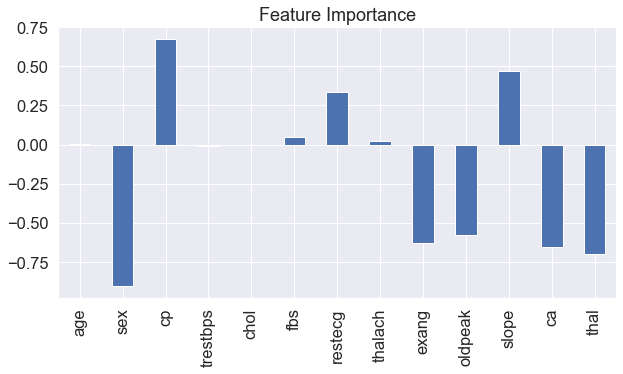

In [67]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False , figsize = (10, 5));

In [68]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


* We can see, when sex is 0 (female), there are almost 3 times as many (72 vs. 24) people with heart disease (target = 1) than without.

# XGboost
* Used XGboost but it didn't work out well.

In [118]:
np.random.seed(42)
# load the dataset
dataframe = pd.read_csv("heart.csv", header=None)
data = dataframe.values
data = data[1:]
# split data into input and output columns
X, y = data[:, :-1], data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
#define model
...
# create an xgboost regression model
model = XGBRegressor(n_estimators=20, max_depth=100, eta=0.1, subsample=0.7, colsample_bytree=0.8)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive

scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.299 (0.042)


In [119]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.100000001, max_delta_step=0, max_depth=100,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [120]:
model.score(X_test,y_test)

0.5369701736274137

In [115]:
log_reg_grid = {"n_estimators":range(40 , 81 ,10), "max_depth":range(40 , 81 ,10) ,"eta":[0.5,0.6,0.7,0.8], "subsample":[0.5,0.6,0.7,0.8], "colsample_bytree":[0.5,0.6,0.7,0.8]}
# log_reg_grid = {"n_estimators":[10], "max_depth":[10] ,"eta":[0.1], "subsample":[0.1], "colsample_bytree":[0.1]}

# Setup grid hyperparameter search for LogisticRegression
gs_XG_reg = GridSearchCV(XGBRegressor(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=2)

# Fit grid hyperparameter search model
gs_XG_reg.fit(X_train, y_train);

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=40, n_estimators=40, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=40, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=40, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=40, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=40, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=40, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=40, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=40, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=40, n_estimators=40, subsample=0.6; total tim

[CV] END colsample_bytree=0.5, eta=0.5, max_depth=40, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=40, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=40, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=40, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=40, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=40, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=40, n_estimators=80, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=40, n_estimators=80, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=40, n_estimators=80, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=40, n

[CV] END colsample_bytree=0.5, eta=0.5, max_depth=50, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=50, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=50, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=50, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=50, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=50, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=50, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=50, n_estimators=70, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=50, n_estimators=70, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=50, n

[CV] END colsample_bytree=0.5, eta=0.5, max_depth=60, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=60, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=60, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=60, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=60, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=60, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=60, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=60, n_estimators=60, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=60, n_estimators=60, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=60, n

[CV] END colsample_bytree=0.5, eta=0.5, max_depth=70, n_estimators=40, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=70, n_estimators=40, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=70, n_estimators=40, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=70, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=70, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=70, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=70, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=70, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=70, n_estimators=50, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=70, n

[CV] END colsample_bytree=0.5, eta=0.5, max_depth=70, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=70, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=70, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=80, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=80, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=80, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=80, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=80, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=80, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=80, n

[CV] END colsample_bytree=0.5, eta=0.5, max_depth=80, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=80, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=80, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=80, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=80, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=80, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=80, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=80, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=80, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.5, max_depth=80, n

[CV] END colsample_bytree=0.5, eta=0.6, max_depth=40, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=40, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=40, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=40, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=40, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=40, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=40, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=40, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=40, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=40, n

[CV] END colsample_bytree=0.5, eta=0.6, max_depth=50, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=50, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=50, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=50, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=50, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=50, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=50, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=50, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=50, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=50, n

[CV] END colsample_bytree=0.5, eta=0.6, max_depth=60, n_estimators=40, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=60, n_estimators=40, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=60, n_estimators=40, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=60, n_estimators=40, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=60, n_estimators=40, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=60, n_estimators=40, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=60, n_estimators=40, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=60, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=60, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=60, n

[CV] END colsample_bytree=0.5, eta=0.6, max_depth=60, n_estimators=80, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=60, n_estimators=80, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=60, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=60, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=60, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=60, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=60, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=70, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=70, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=70, n

[CV] END colsample_bytree=0.5, eta=0.6, max_depth=70, n_estimators=70, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=70, n_estimators=70, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=70, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=70, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=70, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=70, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=70, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=70, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=70, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=70, n

[CV] END colsample_bytree=0.5, eta=0.6, max_depth=80, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=80, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=80, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=80, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=80, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=80, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=80, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=80, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=80, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.6, max_depth=80, n

[CV] END colsample_bytree=0.5, eta=0.7, max_depth=40, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=40, n_estimators=50, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=40, n_estimators=50, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=40, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=40, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=40, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=40, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=40, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=40, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=40, n

[CV] END colsample_bytree=0.5, eta=0.7, max_depth=50, n_estimators=40, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=50, n_estimators=40, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=50, n_estimators=40, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=50, n_estimators=40, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=50, n_estimators=40, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=50, n_estimators=40, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=50, n_estimators=40, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=50, n_estimators=40, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=50, n_estimators=40, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=50, n

[CV] END colsample_bytree=0.5, eta=0.7, max_depth=50, n_estimators=80, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=50, n_estimators=80, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=50, n_estimators=80, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=50, n_estimators=80, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=50, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=50, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=50, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=50, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=50, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=60, n

[CV] END colsample_bytree=0.5, eta=0.7, max_depth=60, n_estimators=70, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=60, n_estimators=70, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=60, n_estimators=70, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=60, n_estimators=70, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=60, n_estimators=70, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=60, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=60, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=60, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=60, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=60, n

[CV] END colsample_bytree=0.5, eta=0.7, max_depth=70, n_estimators=60, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=70, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=70, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=70, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=70, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=70, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=70, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=70, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=70, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=70, n

[CV] END colsample_bytree=0.5, eta=0.7, max_depth=80, n_estimators=50, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=80, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=80, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=80, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=80, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=80, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=80, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=80, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=80, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.7, max_depth=80, n

[CV] END colsample_bytree=0.5, eta=0.8, max_depth=40, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=40, n_estimators=40, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=40, n_estimators=40, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=40, n_estimators=40, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=40, n_estimators=40, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=40, n_estimators=40, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=40, n_estimators=40, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=40, n_estimators=40, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=40, n_estimators=40, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=40, n

[CV] END colsample_bytree=0.5, eta=0.8, max_depth=40, n_estimators=80, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=40, n_estimators=80, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=40, n_estimators=80, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=40, n_estimators=80, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=40, n_estimators=80, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=40, n_estimators=80, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=40, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=40, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=40, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=40, n

[CV] END colsample_bytree=0.5, eta=0.8, max_depth=50, n_estimators=70, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=50, n_estimators=70, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=50, n_estimators=70, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=50, n_estimators=70, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=50, n_estimators=70, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=50, n_estimators=70, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=50, n_estimators=70, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=50, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=50, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=50, n

[CV] END colsample_bytree=0.5, eta=0.8, max_depth=60, n_estimators=60, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=60, n_estimators=60, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=60, n_estimators=60, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=60, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=60, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=60, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=60, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=60, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=60, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=60, n

[CV] END colsample_bytree=0.5, eta=0.8, max_depth=70, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=70, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=70, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=70, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=70, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=70, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=70, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=70, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=70, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=70, n

[CV] END colsample_bytree=0.5, eta=0.8, max_depth=80, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=80, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=80, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=80, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=80, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=80, n_estimators=40, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=80, n_estimators=40, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=80, n_estimators=40, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=80, n_estimators=40, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=80, n

[CV] END colsample_bytree=0.5, eta=0.8, max_depth=80, n_estimators=80, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=80, n_estimators=80, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=80, n_estimators=80, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=80, n_estimators=80, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=80, n_estimators=80, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=80, n_estimators=80, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=80, n_estimators=80, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=80, n_estimators=80, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=80, n_estimators=80, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, eta=0.8, max_depth=80, n

[CV] END colsample_bytree=0.6, eta=0.5, max_depth=40, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=40, n_estimators=70, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=40, n_estimators=70, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=40, n_estimators=70, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=40, n_estimators=70, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=40, n_estimators=70, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=40, n_estimators=70, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=40, n_estimators=70, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=40, n_estimators=70, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=40, n

[CV] END colsample_bytree=0.6, eta=0.5, max_depth=50, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=50, n_estimators=60, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=50, n_estimators=60, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=50, n_estimators=60, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=50, n_estimators=60, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=50, n_estimators=60, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=50, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=50, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=50, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=50, n

[CV] END colsample_bytree=0.6, eta=0.5, max_depth=60, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=60, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=60, n_estimators=50, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=60, n_estimators=50, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=60, n_estimators=50, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=60, n_estimators=50, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=60, n_estimators=50, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=60, n_estimators=50, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=60, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=60, n

[CV] END colsample_bytree=0.6, eta=0.5, max_depth=70, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=70, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=70, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=70, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=70, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=70, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=70, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=70, n_estimators=40, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=70, n_estimators=40, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=70, n

[CV] END colsample_bytree=0.6, eta=0.5, max_depth=70, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=70, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=70, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=70, n_estimators=80, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=70, n_estimators=80, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=70, n_estimators=80, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=70, n_estimators=80, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=70, n_estimators=80, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=70, n_estimators=80, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=70, n

[CV] END colsample_bytree=0.6, eta=0.5, max_depth=80, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=80, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=80, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=80, n_estimators=70, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=80, n_estimators=70, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=80, n_estimators=70, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=80, n_estimators=70, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=80, n_estimators=70, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=80, n_estimators=70, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.5, max_depth=80, n

[CV] END colsample_bytree=0.6, eta=0.6, max_depth=40, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=40, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=40, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=40, n_estimators=60, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=40, n_estimators=60, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=40, n_estimators=60, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=40, n_estimators=60, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=40, n_estimators=60, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=40, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=40, n

[CV] END colsample_bytree=0.6, eta=0.6, max_depth=50, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=50, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=50, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=50, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=50, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=50, n_estimators=50, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=50, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=50, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=50, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=50, n

[CV] END colsample_bytree=0.6, eta=0.6, max_depth=60, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=60, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=60, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=60, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=60, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=60, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=60, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=60, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=60, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=60, n

[CV] END colsample_bytree=0.6, eta=0.6, max_depth=60, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=60, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=60, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=60, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=60, n_estimators=80, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=60, n_estimators=80, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=60, n_estimators=80, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=60, n_estimators=80, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=60, n_estimators=80, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=60, n

[CV] END colsample_bytree=0.6, eta=0.6, max_depth=70, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=70, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=70, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=70, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=70, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=70, n_estimators=70, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=70, n_estimators=70, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=70, n_estimators=70, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=70, n_estimators=70, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=70, n

[CV] END colsample_bytree=0.6, eta=0.6, max_depth=80, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=80, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=80, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=80, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=80, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=80, n_estimators=60, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=80, n_estimators=60, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=80, n_estimators=60, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=80, n_estimators=60, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.6, max_depth=80, n

[CV] END colsample_bytree=0.6, eta=0.7, max_depth=40, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=40, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=40, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=40, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=40, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=40, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=40, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=40, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=40, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=40, n

[CV] END colsample_bytree=0.6, eta=0.7, max_depth=50, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=50, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=50, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=50, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=50, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=50, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=50, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=50, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=50, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=50, n

[CV] END colsample_bytree=0.6, eta=0.7, max_depth=50, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=50, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=50, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=50, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=50, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=50, n_estimators=80, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=50, n_estimators=80, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=50, n_estimators=80, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=50, n_estimators=80, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=50, n

[CV] END colsample_bytree=0.6, eta=0.7, max_depth=60, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=60, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=60, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=60, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=60, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=60, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=60, n_estimators=70, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=60, n_estimators=70, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=60, n_estimators=70, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=60, n

[CV] END colsample_bytree=0.6, eta=0.7, max_depth=70, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=70, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=70, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=70, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=70, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=70, n_estimators=60, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=70, n_estimators=60, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=70, n_estimators=60, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=70, n_estimators=60, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=70, n

[CV] END colsample_bytree=0.6, eta=0.7, max_depth=80, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=80, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=80, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=80, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=80, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=80, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=80, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=80, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=80, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.7, max_depth=80, n

[CV] END colsample_bytree=0.6, eta=0.8, max_depth=40, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=40, n_estimators=40, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=40, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=40, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=40, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=40, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=40, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=40, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=40, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=40, n

[CV] END colsample_bytree=0.6, eta=0.8, max_depth=40, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=40, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=40, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=40, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=40, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=40, n_estimators=80, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=40, n_estimators=80, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=40, n_estimators=80, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=40, n_estimators=80, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=40, n

[CV] END colsample_bytree=0.6, eta=0.8, max_depth=50, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=50, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=50, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=50, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=50, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=50, n_estimators=70, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=50, n_estimators=70, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=50, n_estimators=70, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=50, n_estimators=70, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=50, n

[CV] END colsample_bytree=0.6, eta=0.8, max_depth=60, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=60, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=60, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=60, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=60, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=60, n_estimators=60, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=60, n_estimators=60, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=60, n_estimators=60, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=60, n_estimators=60, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=60, n

[CV] END colsample_bytree=0.6, eta=0.8, max_depth=70, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=70, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=70, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=70, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=70, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=70, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=70, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=70, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=70, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=70, n

[CV] END colsample_bytree=0.6, eta=0.8, max_depth=70, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=80, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=80, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=80, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=80, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=80, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=80, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=80, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=80, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=80, n

[CV] END colsample_bytree=0.6, eta=0.8, max_depth=80, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=80, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=80, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=80, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=80, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=80, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=80, n_estimators=80, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=80, n_estimators=80, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=80, n_estimators=80, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.8, max_depth=80, n

[CV] END colsample_bytree=0.7, eta=0.5, max_depth=40, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=40, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=40, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=40, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=40, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=40, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=40, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=40, n_estimators=70, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=40, n_estimators=70, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=40, n

[CV] END colsample_bytree=0.7, eta=0.5, max_depth=50, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=50, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=50, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=50, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=50, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=50, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=50, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=50, n_estimators=60, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=50, n_estimators=60, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=50, n

[CV] END colsample_bytree=0.7, eta=0.5, max_depth=60, n_estimators=40, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=60, n_estimators=40, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=60, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=60, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=60, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=60, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=60, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=60, n_estimators=50, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=60, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=60, n

[CV] END colsample_bytree=0.7, eta=0.5, max_depth=60, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=60, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=60, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=70, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=70, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=70, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=70, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=70, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=70, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=70, n

[CV] END colsample_bytree=0.7, eta=0.5, max_depth=70, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=70, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=70, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=70, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=70, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=70, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=70, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=70, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=70, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=70, n

[CV] END colsample_bytree=0.7, eta=0.5, max_depth=80, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=80, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=80, n_estimators=60, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=80, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=80, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=80, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=80, n_estimators=70, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=80, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=80, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.5, max_depth=80, n

[CV] END colsample_bytree=0.7, eta=0.6, max_depth=40, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=40, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=40, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=40, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=40, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=40, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=40, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=40, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=40, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=40, n

[CV] END colsample_bytree=0.7, eta=0.6, max_depth=50, n_estimators=40, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=50, n_estimators=40, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=50, n_estimators=40, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=50, n_estimators=40, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=50, n_estimators=40, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=50, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=50, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=50, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=50, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=50, n

[CV] END colsample_bytree=0.7, eta=0.6, max_depth=50, n_estimators=80, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=50, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=50, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=50, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=50, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=50, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=60, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=60, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=60, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=60, n

[CV] END colsample_bytree=0.7, eta=0.6, max_depth=60, n_estimators=70, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=60, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=60, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=60, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=60, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=60, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=60, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=60, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=60, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=60, n

[CV] END colsample_bytree=0.7, eta=0.6, max_depth=70, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=70, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=70, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=70, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=70, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=70, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=70, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=70, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=70, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=70, n

[CV] END colsample_bytree=0.7, eta=0.6, max_depth=80, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=80, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=80, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=80, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=80, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=80, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=80, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=80, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=80, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.6, max_depth=80, n

[CV] END colsample_bytree=0.7, eta=0.7, max_depth=40, n_estimators=40, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=40, n_estimators=40, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=40, n_estimators=40, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=40, n_estimators=40, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=40, n_estimators=40, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=40, n_estimators=40, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=40, n_estimators=40, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=40, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=40, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=40, n

[CV] END colsample_bytree=0.7, eta=0.7, max_depth=40, n_estimators=80, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=40, n_estimators=80, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=40, n_estimators=80, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=40, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=40, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=40, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=40, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=40, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=50, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=50, n

[CV] END colsample_bytree=0.7, eta=0.7, max_depth=50, n_estimators=70, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=50, n_estimators=70, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=50, n_estimators=70, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=50, n_estimators=70, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=50, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=50, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=50, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=50, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=50, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=50, n

[CV] END colsample_bytree=0.7, eta=0.7, max_depth=60, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=60, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=60, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=60, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=60, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=60, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=60, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=60, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=60, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=60, n

[CV] END colsample_bytree=0.7, eta=0.7, max_depth=70, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=70, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=70, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=70, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=70, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=70, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=70, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=70, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=70, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=70, n

[CV] END colsample_bytree=0.7, eta=0.7, max_depth=80, n_estimators=40, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=80, n_estimators=40, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=80, n_estimators=40, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=80, n_estimators=40, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=80, n_estimators=40, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=80, n_estimators=40, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=80, n_estimators=40, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=80, n_estimators=40, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=80, n_estimators=40, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=80, n

[CV] END colsample_bytree=0.7, eta=0.7, max_depth=80, n_estimators=80, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=80, n_estimators=80, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=80, n_estimators=80, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=80, n_estimators=80, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=80, n_estimators=80, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=80, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=80, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=80, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=80, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.7, max_depth=80, n

[CV] END colsample_bytree=0.7, eta=0.8, max_depth=40, n_estimators=70, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=40, n_estimators=70, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=40, n_estimators=70, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=40, n_estimators=70, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=40, n_estimators=70, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=40, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=40, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=40, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=40, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=40, n

[CV] END colsample_bytree=0.7, eta=0.8, max_depth=50, n_estimators=60, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=50, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=50, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=50, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=50, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=50, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=50, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=50, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=50, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=50, n

[CV] END colsample_bytree=0.7, eta=0.8, max_depth=60, n_estimators=50, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=60, n_estimators=50, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=60, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=60, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=60, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=60, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=60, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=60, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=60, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=60, n

[CV] END colsample_bytree=0.7, eta=0.8, max_depth=70, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=70, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=70, n_estimators=40, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=70, n_estimators=40, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=70, n_estimators=40, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=70, n_estimators=40, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=70, n_estimators=40, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=70, n_estimators=40, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=70, n_estimators=40, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=70, n

[CV] END colsample_bytree=0.7, eta=0.8, max_depth=70, n_estimators=80, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=70, n_estimators=80, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=70, n_estimators=80, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=70, n_estimators=80, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=70, n_estimators=80, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=70, n_estimators=80, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=70, n_estimators=80, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=70, n_estimators=80, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=70, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=70, n

[CV] END colsample_bytree=0.7, eta=0.8, max_depth=80, n_estimators=70, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=80, n_estimators=70, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=80, n_estimators=70, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=80, n_estimators=70, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=80, n_estimators=70, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=80, n_estimators=70, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=80, n_estimators=70, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=80, n_estimators=70, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=80, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.8, max_depth=80, n

[CV] END colsample_bytree=0.8, eta=0.5, max_depth=40, n_estimators=60, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=40, n_estimators=60, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=40, n_estimators=60, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=40, n_estimators=60, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=40, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=40, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=40, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=40, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=40, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=40, n

[CV] END colsample_bytree=0.8, eta=0.5, max_depth=50, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=50, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=50, n_estimators=50, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=50, n_estimators=50, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=50, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=50, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=50, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=50, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=50, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=50, n

[CV] END colsample_bytree=0.8, eta=0.5, max_depth=60, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=60, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=60, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=60, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=60, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=60, n_estimators=40, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=60, n_estimators=40, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=60, n_estimators=40, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=60, n_estimators=40, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=60, n

[CV] END colsample_bytree=0.8, eta=0.5, max_depth=60, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=60, n_estimators=80, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=60, n_estimators=80, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=60, n_estimators=80, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=60, n_estimators=80, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=60, n_estimators=80, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=60, n_estimators=80, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=60, n_estimators=80, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=60, n_estimators=80, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=60, n

[CV] END colsample_bytree=0.8, eta=0.5, max_depth=70, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=70, n_estimators=70, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=70, n_estimators=70, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=70, n_estimators=70, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=70, n_estimators=70, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=70, n_estimators=70, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=70, n_estimators=70, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=70, n_estimators=70, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=70, n_estimators=70, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=70, n

[CV] END colsample_bytree=0.8, eta=0.5, max_depth=80, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=80, n_estimators=60, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=80, n_estimators=60, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=80, n_estimators=60, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=80, n_estimators=60, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=80, n_estimators=60, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=80, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=80, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=80, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.5, max_depth=80, n

[CV] END colsample_bytree=0.8, eta=0.6, max_depth=40, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=40, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=40, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=40, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=40, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=40, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=40, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=40, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=40, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=40, n

[CV] END colsample_bytree=0.8, eta=0.6, max_depth=50, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=50, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=50, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=50, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=50, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=50, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=50, n_estimators=40, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=50, n_estimators=40, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=50, n_estimators=40, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=50, n

[CV] END colsample_bytree=0.8, eta=0.6, max_depth=50, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=50, n_estimators=80, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=50, n_estimators=80, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=50, n_estimators=80, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=50, n_estimators=80, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=50, n_estimators=80, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=50, n_estimators=80, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=50, n_estimators=80, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=50, n_estimators=80, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=50, n

[CV] END colsample_bytree=0.8, eta=0.6, max_depth=60, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=60, n_estimators=70, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=60, n_estimators=70, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=60, n_estimators=70, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=60, n_estimators=70, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=60, n_estimators=70, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=60, n_estimators=70, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=60, n_estimators=70, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=60, n_estimators=70, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=60, n

[CV] END colsample_bytree=0.8, eta=0.6, max_depth=70, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=70, n_estimators=60, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=70, n_estimators=60, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=70, n_estimators=60, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=70, n_estimators=60, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=70, n_estimators=60, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=70, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=70, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=70, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=70, n

[CV] END colsample_bytree=0.8, eta=0.6, max_depth=80, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=80, n_estimators=50, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=80, n_estimators=50, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=80, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=80, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=80, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=80, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=80, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=80, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.6, max_depth=80, n

[CV] END colsample_bytree=0.8, eta=0.7, max_depth=40, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=40, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=40, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=40, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=40, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=40, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=40, n_estimators=40, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=40, n_estimators=40, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=40, n_estimators=40, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=40, n

[CV] END colsample_bytree=0.8, eta=0.7, max_depth=40, n_estimators=80, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=40, n_estimators=80, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=40, n_estimators=80, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=40, n_estimators=80, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=40, n_estimators=80, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=40, n_estimators=80, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=40, n_estimators=80, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=40, n_estimators=80, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=40, n_estimators=80, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=40, n

[CV] END colsample_bytree=0.8, eta=0.7, max_depth=50, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=50, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=50, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=50, n_estimators=70, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=50, n_estimators=70, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=50, n_estimators=70, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=50, n_estimators=70, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=50, n_estimators=70, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=50, n_estimators=70, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=50, n

[CV] END colsample_bytree=0.8, eta=0.7, max_depth=60, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=60, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=60, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=60, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=60, n_estimators=60, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=60, n_estimators=60, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=60, n_estimators=60, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=60, n_estimators=60, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=60, n_estimators=60, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=60, n

[CV] END colsample_bytree=0.8, eta=0.7, max_depth=70, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=70, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=70, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=70, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=70, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=70, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=70, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=70, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=70, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=70, n

[CV] END colsample_bytree=0.8, eta=0.7, max_depth=70, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=80, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=80, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=80, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=80, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=80, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=80, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=80, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=80, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=80, n

[CV] END colsample_bytree=0.8, eta=0.7, max_depth=80, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=80, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=80, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=80, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=80, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=80, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=80, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=80, n_estimators=80, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=80, n_estimators=80, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.7, max_depth=80, n

[CV] END colsample_bytree=0.8, eta=0.8, max_depth=40, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=40, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=40, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=40, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=40, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=40, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=40, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=40, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=40, n_estimators=70, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=40, n

[CV] END colsample_bytree=0.8, eta=0.8, max_depth=50, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=50, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=50, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=50, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=50, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=50, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=50, n_estimators=60, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=50, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=50, n_estimators=60, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=50, n

[CV] END colsample_bytree=0.8, eta=0.8, max_depth=60, n_estimators=40, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=60, n_estimators=40, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=60, n_estimators=40, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=60, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=60, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=60, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=60, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=60, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=60, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=60, n

[CV] END colsample_bytree=0.8, eta=0.8, max_depth=60, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=60, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=60, n_estimators=80, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=70, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=70, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=70, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=70, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=70, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=70, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=70, n

[CV] END colsample_bytree=0.8, eta=0.8, max_depth=70, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=70, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=70, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=70, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=70, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=70, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=70, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=70, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=70, n_estimators=80, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=70, n

[CV] END colsample_bytree=0.8, eta=0.8, max_depth=80, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=80, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=80, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=80, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=80, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=80, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=80, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=80, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=80, n_estimators=70, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, eta=0.8, max_depth=80, n

In [116]:
gs_XG_reg.best_params_

{'colsample_bytree': 0.5,
 'eta': 0.5,
 'max_depth': 40,
 'n_estimators': 50,
 'subsample': 0.8}

In [117]:
gs_XG_reg.best_score_

0.37036068426564356